In [1]:
import numpy as np
import pandas as pd

In [2]:
spam_df = pd.read_csv('spam_data.csv', sep=",", encoding='latin')

In [3]:
# missing values
spam_df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:
spam_df['Unnamed: 2'].fillna(' ', inplace=True)
spam_df['Unnamed: 3'].fillna(' ', inplace=True)
spam_df['Unnamed: 4'].fillna(' ', inplace=True)
spam_df['v2'] = spam_df['v2'] + ' ' + spam_df['Unnamed: 2'] + ' ' + spam_df['Unnamed: 3'] + ' ' + spam_df['Unnamed: 4']
spam_df.drop(columns=[col.strip() for col in ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'] if col.strip() in spam_df.columns], inplace=True)
spam_df.head(20)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [5]:
# rename column
spam_df.rename(columns={'v1':'target','v2':'text'}, inplace = True)
spam_df.sample(3)

,target,text
4982,ham,Networking job is there.
836,spam,Do you want 750 anytime any network mins 150 t...
3716,ham,I'm gonna rip out my uterus.


In [6]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
spam_df['target'] = le.fit_transform(spam_df['target'])
spam_df.sample(3)

,target,text
5262,0,Did you see that film:)
2873,0,Crucify is c not s. You should have told me ea...
4891,0,Miserable. They don't tell u that the side eff...


In [7]:
# duplicates
spam_df.duplicated().sum()

403

In [8]:
spam_df = spam_df.drop_duplicates(keep='first')

In [9]:
spam_df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

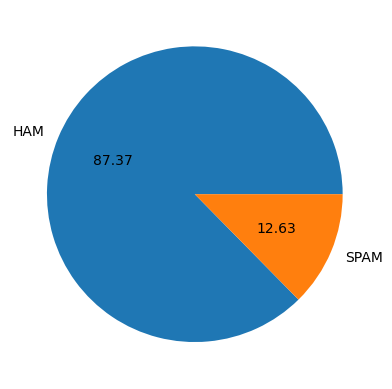

In [10]:
# matplot visuals
import matplotlib.pyplot as plt
plt.pie(spam_df['target'].value_counts(), labels = ['HAM','SPAM'], autopct="%0.2f")
plt.show() #IMBALANCED DATA

In [11]:
# deeper analysis on text
import nltk

In [12]:
spam_df.loc[:,'no_chars'] = spam_df['text'].apply(len)
spam_df.head(2)

,target,text,no_chars
0,0,"Go until jurong point, crazy.. Available only ...",117
1,0,Ok lar... Joking wif u oni...,35


In [13]:
spam_df['no_words'] = spam_df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
spam_df.head(3)

,target,text,no_chars,no_words
0,0,"Go until jurong point, crazy.. Available only ...",117,24
1,0,Ok lar... Joking wif u oni...,35,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,161,37


In [14]:
spam_df['no_sentences'] = spam_df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
spam_df.head()

,target,text,no_chars,no_words,no_sentences
0,0,"Go until jurong point, crazy.. Available only ...",117,24,2
1,0,Ok lar... Joking wif u oni...,35,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,161,37,2
3,0,U dun say so early hor... U c already then say...,55,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",67,15,1


In [15]:
spam_df[['no_chars','no_words','no_sentences']].describe()

,no_chars,no_words,no_sentences
count,5169.000000,5169.000000,5169.000000
mean,85.516541,18.592184,1.952989
std,58.454507,13.389124,1.365172
min,8.000000,1.000000,1.000000
25%,42.000000,9.000000,1.000000
50%,67.000000,15.000000,1.000000
75%,125.000000,26.000000,2.000000
max,916.000000,220.000000,28.000000


In [16]:
# HAM
spam_df[spam_df['target'] == 0][['no_chars','no_words','no_sentences']].describe()

,no_chars,no_words,no_sentences
count,4516.000000,4516.000000,4516.000000
mean,77.037422,17.267936,1.805137
std,56.680357,13.574957,1.281310
min,8.000000,1.000000,1.000000
25%,40.000000,8.000000,1.000000
50%,59.000000,13.000000,1.000000
75%,98.000000,22.000000,2.000000
max,916.000000,220.000000,28.000000


In [17]:
# SPAM
spam_df[spam_df['target'] == 1][['no_chars','no_words','no_sentences']].describe()

,no_chars,no_words,no_sentences
count,653.000000,653.000000,653.000000
mean,144.156202,27.750383,2.975498
std,29.913630,6.978309,1.484897
min,19.000000,2.000000,1.000000
25%,138.000000,25.000000,2.000000
50%,155.000000,29.000000,3.000000
75%,163.000000,32.000000,4.000000
max,230.000000,46.000000,8.000000


<AxesSubplot:xlabel='no_chars', ylabel='Count'>

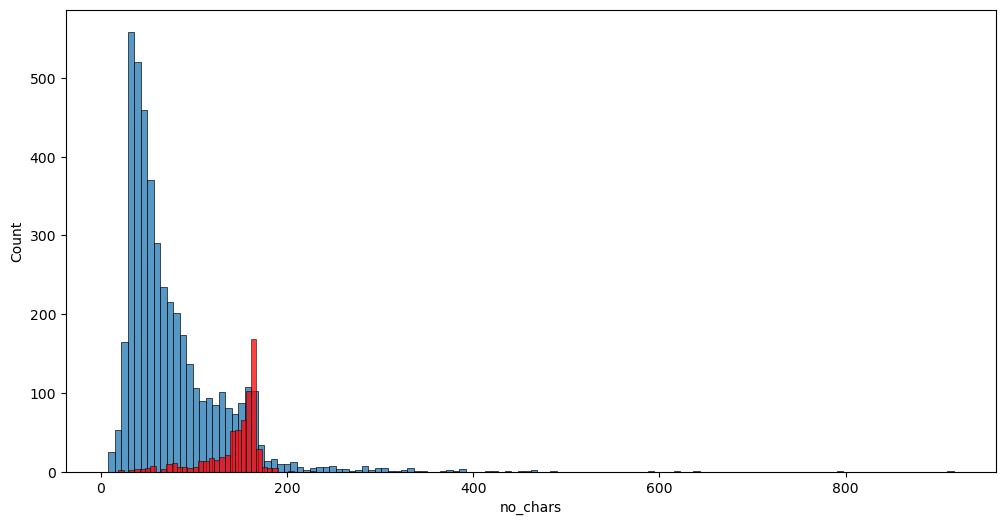

In [18]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(spam_df[spam_df['target']==0]['no_chars'])
sns.histplot(spam_df[spam_df['target']==1]['no_chars'], color='red')

<AxesSubplot:xlabel='no_words', ylabel='Count'>

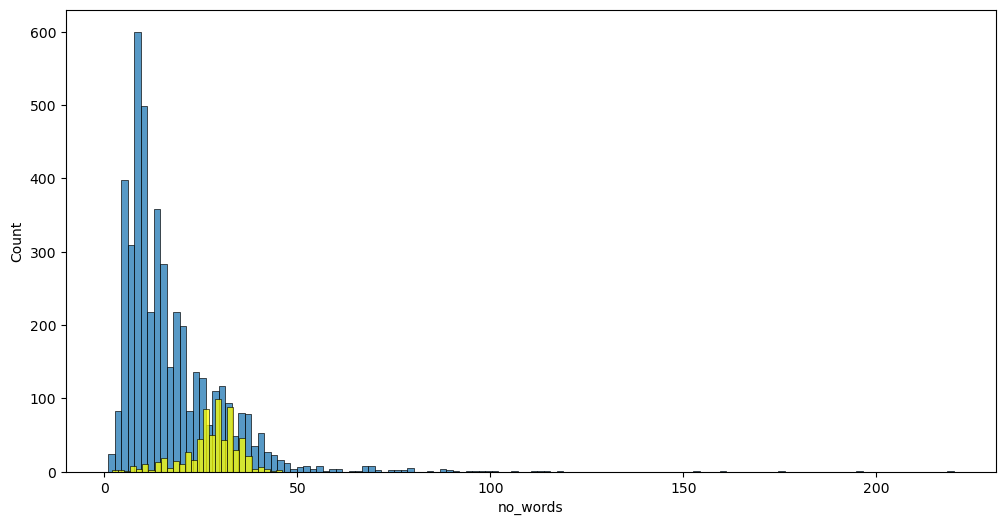

In [19]:
plt.figure(figsize=(12,6))
sns.histplot(spam_df[spam_df['target']==0]['no_words'])
sns.histplot(spam_df[spam_df['target']==1]['no_words'], color='yellow')

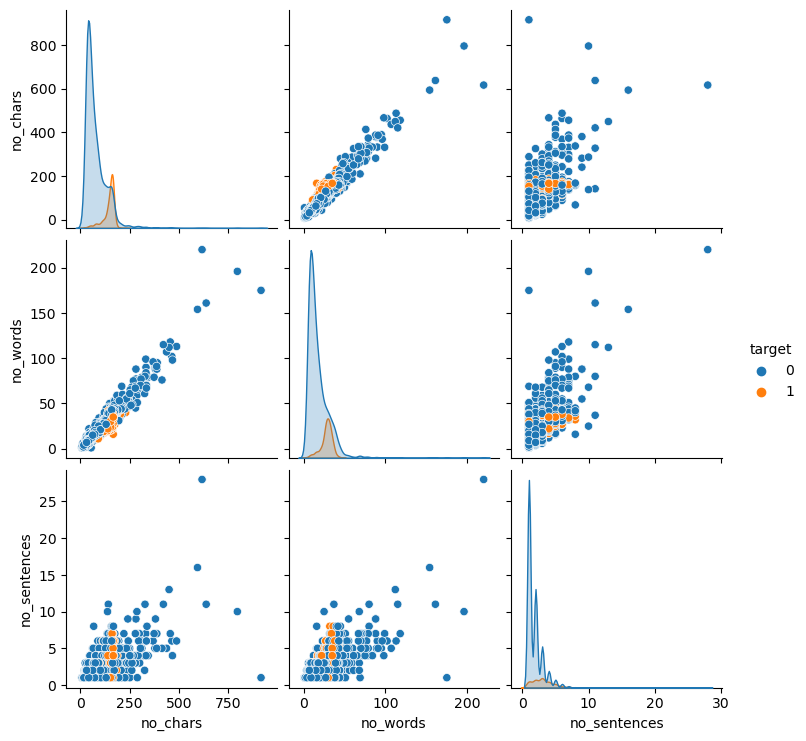

In [20]:
sns.pairplot(spam_df,hue='target')

<AxesSubplot:>

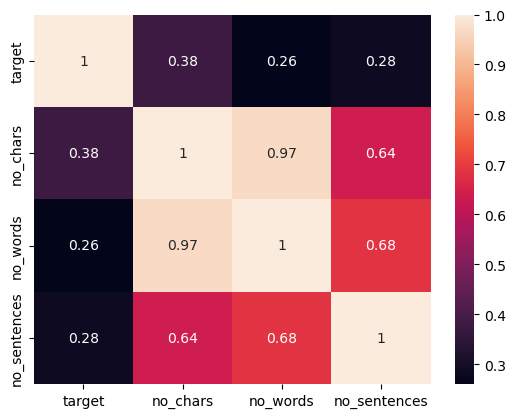

In [21]:
sns.heatmap(spam_df.corr(),annot=True)

In [53]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
nltk.download('stopwords')
ps = PorterStemmer()
wnl = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    li = []
    for i in text:
        li.append(wnl.lemmatize(i))
    
    text = li[:]
    li.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            li.append(i)
            
    text = li[:]
    li.clear()
    for i in text:
        li.append(ps.stem(i))    
            
    return " ".join(li)

In [50]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

"'m gon na home soon n't want talk stuff anymor tonight k 've cri enough today"

In [51]:
spam_df['trans_text'] = spam_df['text'].apply(transform_text)
spam_df.head(3)

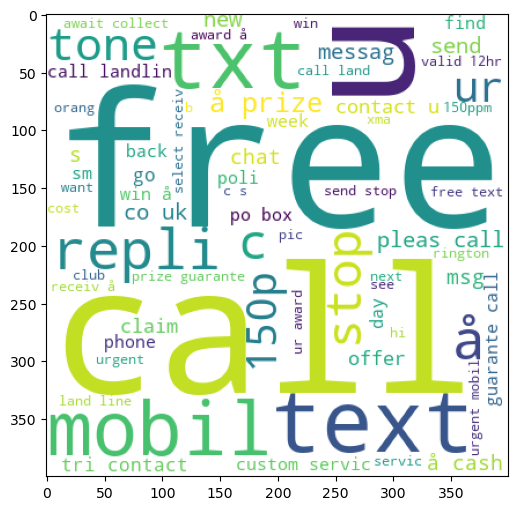

In [55]:
from wordcloud import WordCloud
#SPAM
wc = WordCloud(width=400, height=400, min_font_size=10, background_color='white')
spam_wc = wc.generate(spam_df[spam_df['target']==1]['trans_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

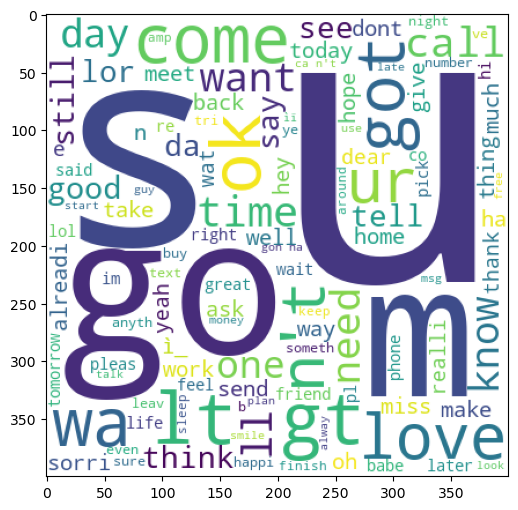

In [57]:
# HAM
ham_wc = wc.generate(spam_df[spam_df['target']==0]['trans_text'].str.cat(sep=" "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)

In [67]:
# creating corpus
spam_corpus = []

for msg in spam_df[spam_df['target']==1]['trans_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

print(len(spam_corpus))

11139


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


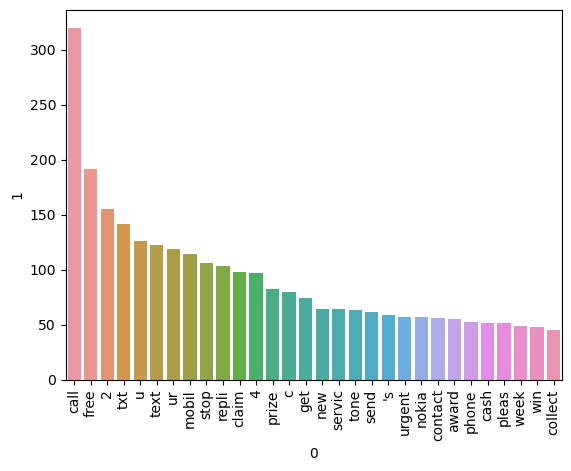

In [65]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [68]:
# creating corpus
ham_corpus = []
for msg in spam_df[spam_df['target']==0]['trans_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

print(len(ham_corpus))

40641


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


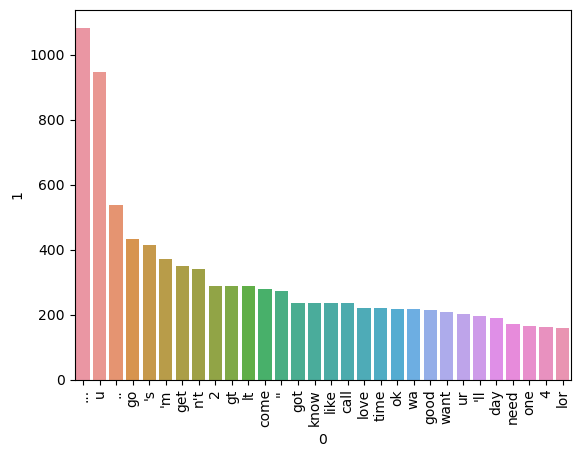

In [73]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()